In [1]:
import numpy as np 
import pandas as pd 
import statistics as stats 
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
df = pd.read_csv("./auto_mpg.csv")
df.sample(10)

mpg  cyl   disp   hp    wt   acc  yr  origin               car name
107  18.0    6  232.0  100  2789  15.0  73       1            amc gremlin
382  34.0    4  108.0   70  2245  16.9  82       3         toyota corolla
338  27.2    4  135.0   84  2490  15.7  81       1       plymouth reliant
317  34.3    4   97.0   78  2188  15.8  80       2              audi 4000
100  18.0    6  250.0   88  3021  16.5  73       1          ford maverick
364  26.6    8  350.0  105  3725  19.0  81       1  oldsmobile cutlass ls
299  27.2    4  141.0   71  3190  24.8  79       2            peugeot 504
336  23.6    4  140.0    ?  2905  14.3  80       1     ford mustang cobra
241  22.0    6  146.0   97  2815  14.5  77       3             datsun 810
15   22.0    6  198.0   95  2833  15.5  70       1        plymouth duster

In [3]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

In [4]:
df.describe(include='all')

mpg         cyl        disp   hp           wt         acc  \
count   398.000000  398.000000  398.000000  398   398.000000  398.000000   
unique         NaN         NaN         NaN   94          NaN         NaN   
top            NaN         NaN         NaN  150          NaN         NaN   
freq           NaN         NaN         NaN   22          NaN         NaN   
mean     23.514573    5.454774  193.425879  NaN  2970.424623   15.568090   
std       7.815984    1.701004  104.269838  NaN   846.841774    2.757689   
min       9.000000    3.000000   68.000000  NaN  1613.000000    8.000000   
25%      17.500000    4.000000  104.250000  NaN  2223.750000   13.825000   
50%      23.000000    4.000000  148.500000  NaN  2803.500000   15.500000   
75%      29.000000    8.000000  262.000000  NaN  3608.000000   17.175000   
max      46.600000    8.000000  455.000000  NaN  5140.000000   24.800000   

                yr      origin    car name  
count   398.000000  398.000000         398  
unique         NaN         NaN         305  
top            NaN         NaN  ford pinto  
freq           NaN         NaN           6  
mean     76.010050    1.572864         NaN  
std       3.697627    0.802055         NaN  
min      70.000000    1.000000         NaN  
25%      73.000000    1.000000         NaN  
50%      76.000000    1.000000         NaN  
75%      79.000000    2.000000         NaN  
max      82.000000    3.000000         NaN

In [5]:

df1 = df[df.hp != '?']
df1 = df1.astype({'hp': float})
meanhp = np.mean(df1.hp)
print(meanhp)      
mask = (df['hp']=='?')
df.loc[mask, 'hp'] = meanhp
df = df.astype({'hp':float})
meanhp = np.mean(df.hp)
print(meanhp)

104.46938775510205
104.46938775510203


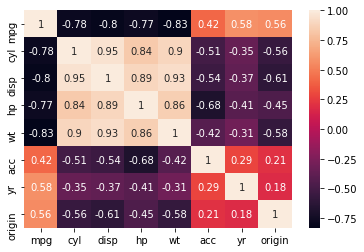

In [6]:
sb.heatmap(df.corr(), annot = True);

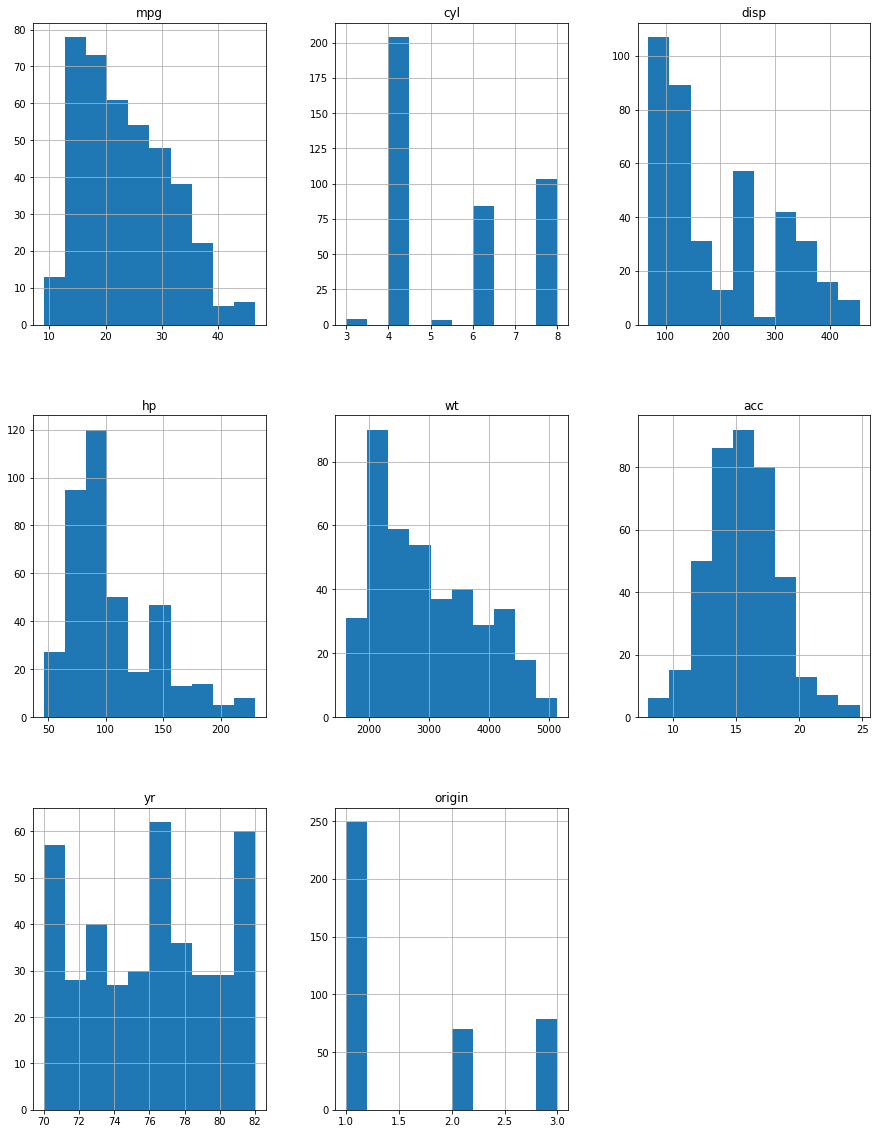

In [7]:
df.hist(figsize= (15,20));

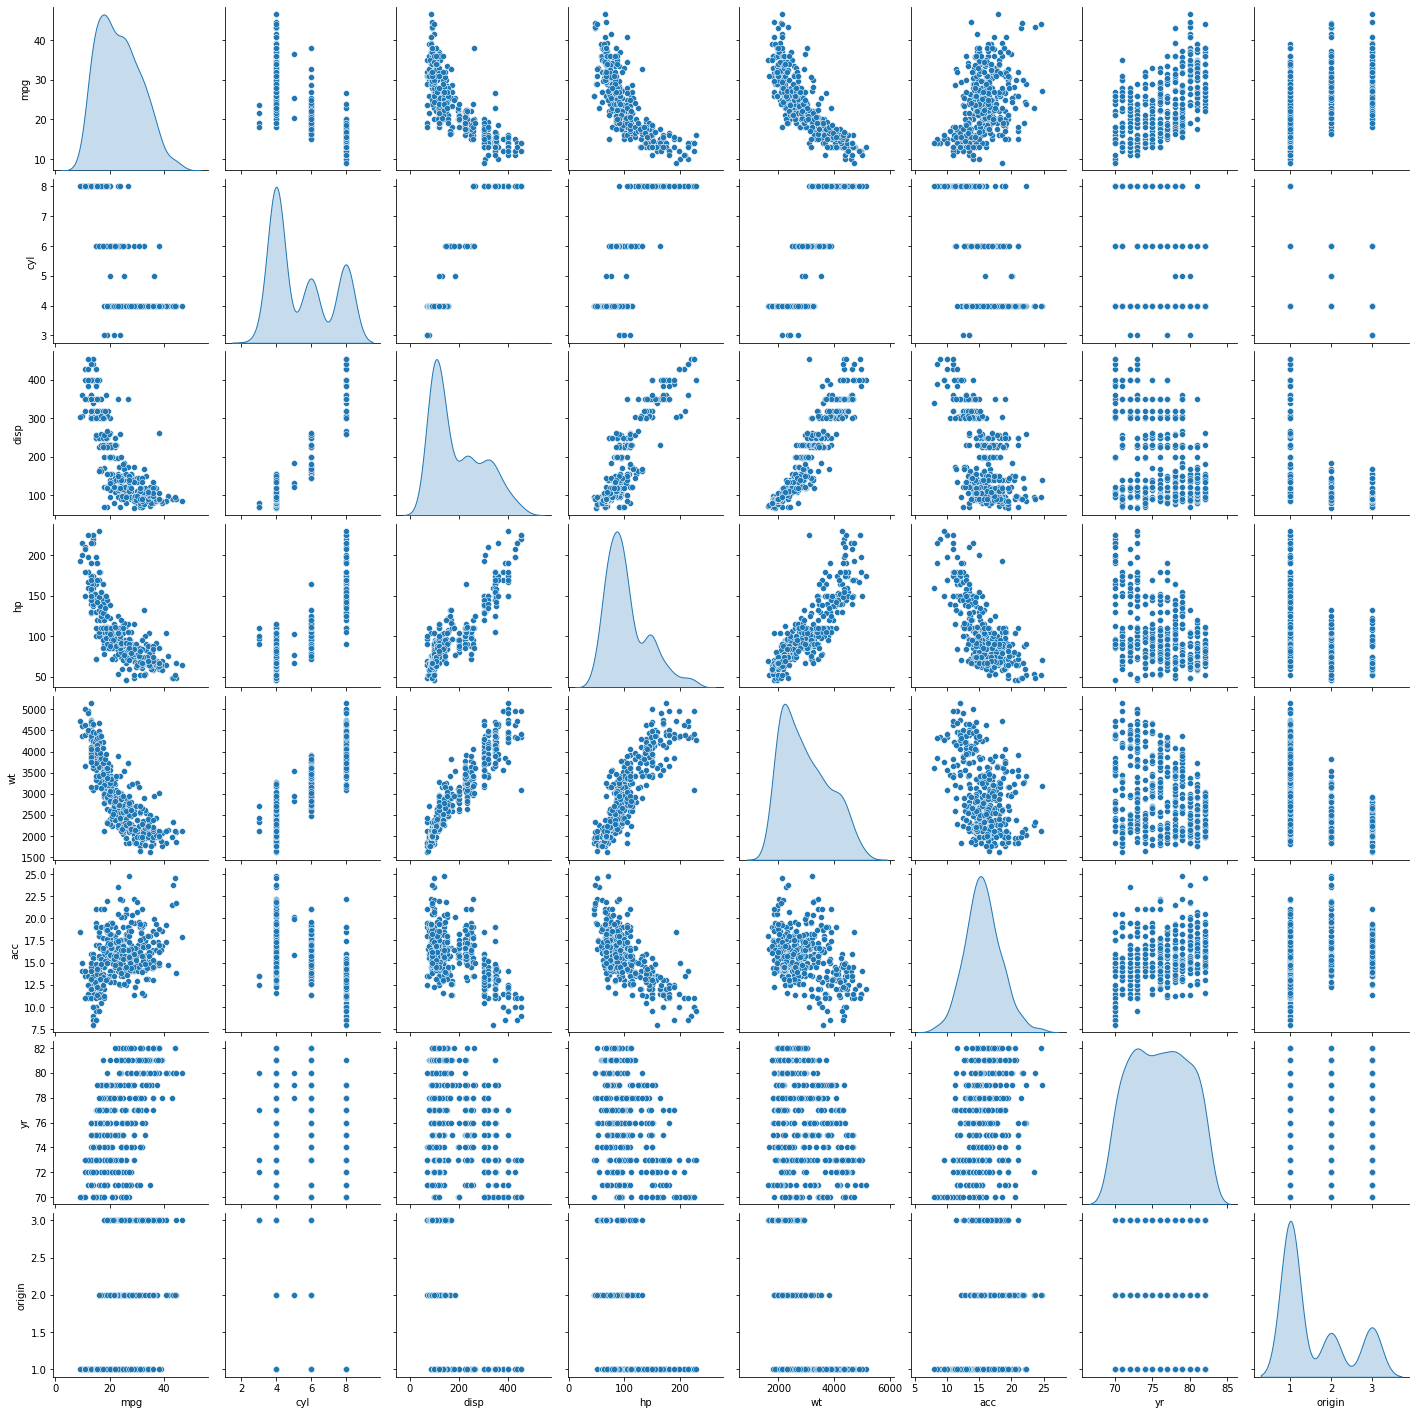

In [8]:
sb.pairplot(df, diag_kind = 'kde');

In [9]:
try:
    df = df.drop('car name', axis= 1)
except:
    df.head()

In [10]:
df.origin = df['origin'].replace({1:'America', 2: 'europe', 3:'Asia'})

In [11]:
df = pd.get_dummies(df, columns= ['origin'])

In [12]:
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin_America  origin_Asia  \
0  18.0    8  307.0  130.0  3504  12.0  70               1            0   
1  15.0    8  350.0  165.0  3693  11.5  70               1            0   
2  18.0    8  318.0  150.0  3436  11.0  70               1            0   
3  16.0    8  304.0  150.0  3433  12.0  70               1            0   
4  17.0    8  302.0  140.0  3449  10.5  70               1            0   

   origin_europe  
0              0  
1              0  
2              0  
3              0  
4              0

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

X = df.drop('mpg', axis = 1)
Y = df.mpg
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X,Y,test_size=0.15, random_state=1)
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(338, 9)
(60, 9)
(338,)
(60,)


In [14]:
# Model Build
reg = LinearRegression()
reg.fit(X_TRAIN, Y_TRAIN)

# Predicted data training
y_train_pred = reg.predict(X_TRAIN)
rmse_Train = np.sqrt(mean_squared_error(Y_TRAIN, y_train_pred))

#Predicted data testing
y_test_pred = reg.predict(X_TEST)
rmse_Test = np.sqrt(mean_squared_error(Y_TEST, y_test_pred))

print("TRAIN ERROR: ", rmse_Train, "\n", "TEST ERROR: ", rmse_Test)

TRAIN ERROR:  3.4050985625362866 
 TEST ERROR:  2.452947070945411


In [15]:
print("TRAIN SCORE: ",reg.score(X_TRAIN, Y_TRAIN), "\n", "TEST SCORE: ", reg.score(X_TEST,Y_TEST))

TRAIN SCORE:  0.8141579567621088 
 TEST SCORE:  0.8854892237877148


# Optimisations

## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_TRAIN_Scaled = sc_X.fit_transform(X_TRAIN)
X_TEST_Scaled = sc_X.transform(X_TEST)

reg_scaled = LinearRegression()
reg_scaled.fit(X_TRAIN_Scaled, Y_TRAIN)

#PRINT SCORES AFTER SCALING
print(reg_scaled.score(X_TRAIN_Scaled, Y_TRAIN), reg_scaled.score(X_TEST_Scaled, Y_TEST))

0.8119977552014706 0.8693119750252751


## Removing correlated variables

In [17]:
df.corr()

mpg       cyl      disp        hp        wt       acc  \
mpg             1.000000 -0.775396 -0.804203 -0.771437 -0.831741  0.420289   
cyl            -0.775396  1.000000  0.950721  0.838939  0.896017 -0.505419   
disp           -0.804203  0.950721  1.000000  0.893646  0.932824 -0.543684   
hp             -0.771437  0.838939  0.893646  1.000000  0.860574 -0.684259   
wt             -0.831741  0.896017  0.932824  0.860574  1.000000 -0.417457   
acc             0.420289 -0.505419 -0.543684 -0.684259 -0.417457  1.000000   
yr              0.579267 -0.348746 -0.370164 -0.411651 -0.306564  0.288137   
origin_America -0.568192  0.604351  0.651407  0.486083  0.598398 -0.250806   
origin_Asia     0.442174 -0.396479 -0.433505 -0.321325 -0.440817  0.109144   
origin_europe   0.259022 -0.352861 -0.373886 -0.281258 -0.298843  0.204473   

                      yr  origin_America  origin_Asia  origin_europe  
mpg             0.579267       -0.568192     0.442174       0.259022  
cyl            -0.348746        0.604351    -0.396479      -0.352861  
disp           -0.370164        0.651407    -0.433505      -0.373886  
hp             -0.411651        0.486083    -0.321325      -0.281258  
wt             -0.306564        0.598398    -0.440817      -0.298843  
acc             0.288137       -0.250806     0.109144       0.204473  
yr              1.000000       -0.139883     0.193101      -0.024489  
origin_America -0.139883        1.000000    -0.643317      -0.597198  
origin_Asia     0.193101       -0.643317     1.000000      -0.229895  
origin_europe  -0.024489       -0.597198    -0.229895       1.000000

### disp is highly positively correlated with cyl, hp, wt,
* Lets perform linear regression taking 1 column out of disp, hp, cyl, wt at a time

In [18]:
df_disp = df.drop(['hp', 'cyl', 'wt'], axis =1)
df_hp = df.drop(['disp', 'cyl', 'wt'], axis =1)
df_cyl = df.drop(['hp', 'disp', 'wt'], axis =1)
df_wt = df.drop(['hp', 'cyl', 'disp'], axis =1)

In [19]:
# With Disp

X_disp = df_disp.drop('mpg', axis =1)
Y_disp = df_disp.mpg
X_TRAIN_disp, X_TEST_disp, Y_TRAIN_disp, Y_TEST_disp = train_test_split(X_disp, Y_disp, test_size= 0.15, random_state= 1)

reg_disp = LinearRegression()
reg_disp.fit(X_TRAIN_disp, Y_TRAIN_disp)

# Print Score
print(reg_disp.score(X_TRAIN_disp, Y_TRAIN_disp), reg_disp.score(X_TEST_disp, Y_TEST_disp))

0.740929649378343 0.8199361745965483


In [20]:
# With Hp
X_hp = df_hp.drop('mpg', axis =1)
Y_hp = df_hp.mpg
X_TRAIN_hp, X_TEST_hp, Y_TRAIN_hp, Y_TEST_hp = train_test_split(X_hp, Y_hp, test_size= 0.15, random_state= 1)

reg_hp = LinearRegression()
reg_hp.fit(X_TRAIN_hp, Y_TRAIN_hp)

# Print Score
print(reg_hp.score(X_TRAIN_hp, Y_TRAIN_hp), reg_hp.score(X_TEST_hp, Y_TEST_hp))


0.7449764180654992 0.7949573216710519


## Using gradient Boosting

In [21]:
# I'll use the variable which has maximum correlation with mpg to predict mpg
X1 = df.drop(['mpg'], axis=1)
Y1 = df.mpg
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size= 0.15, random_state= 1)
print(X1_train.shape)
print(X1_test.shape)
print(Y1_train.shape)
print(Y1_test.shape) 

(338, 9)
(60, 9)
(338,)
(60,)


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model  = GradientBoostingRegressor(max_depth= 2, n_estimators= 3, learning_rate= 1.0)
model.fit(X1_train,Y1_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [23]:
y_pred = model.predict(X1_test)
r2_score(y_pred, Y1_test)

0.7988230048438352

## Lasso

In [24]:
model = linear_model.Lasso(alpha = 1)
model.fit(X_TRAIN, Y_TRAIN)

Lasso(alpha=1)

In [25]:
model.score(X_TEST, Y_TEST)

0.8782609595804152

## Ridge regression

In [26]:
model = linear_model.Ridge(alpha= 10)
model.fit(X_TRAIN, Y_TRAIN)
model.score(X_TEST, Y_TEST)

0.8862829280287842

## Elastic Net

In [27]:
model = linear_model.ElasticNet(random_state= 0)
model.fit(X_TRAIN, Y_TRAIN)
model.score(X_TEST, Y_TEST)

0.8769346291455704

## LARS

In [28]:
lr = linear_model.LassoLars(alpha=0.1)
lr.fit(X_TRAIN,Y_TRAIN)
lr.score(X_TEST,Y_TEST)

0.8364603193082295

In [29]:
# Final Attempt
X2 = df[['cyl', 'disp', 'hp', 'wt','acc','yr']]
Y2 = df.mpg
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2, Y2, test_size=0.15, random_state= 1)
model = LinearRegression()
model.fit(X2_train, Y2_train)
model.score(X2_test, Y2_test)

0.8747723229591772

In [30]:
model = linear_model.ElasticNet(alpha= 1.0)
model.fit(X2_train, Y2_train)
model.score(X2_test, Y2_test)

0.8769346291455704

## Polynomial Regression

In [ ]:
### As disp, cyl, hp, wt are exhibiting multicollinearity, we need to drop a few columns.


In [66]:
dfpoly = df.drop(['cyl','hp'], axis=1)
X3 = dfpoly.drop('mpg', axis=1)
Y3 = dfpoly.mpg
X3_Train, X3_Test, Y3_Train, Y3_Test = train_test_split(X3,Y3, test_size=0.15, random_state= 1)

In [67]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X3_Train)
X_test2 = poly.fit_transform(X3_Test)

poly_model = LinearRegression()
poly_model.fit(X_train2, Y_TRAIN)
print(poly_model.score(X_train2, Y_TRAIN), poly_model.score(X_test2, Y_TEST))


0.9066897942242373 0.9211613827179628
